## WeatherPy

### Analysis

As suspected, the weather becomes warmer the closer you get to the equator (0 degrees latitude). There are some spikes in temperature between 20 degrees and 40 degrees latitude.

Neither humiditiy, cloudiness nor wind speed have direct relationships with the latitude. This applies to both the Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude).

There is a negative correlation between temperature and latitude. The further away from the equator (0 degrees latitude), the lower the temperature.

There is a positive correlation between latitude and max temperature. The closer you get to the equator (0 degrees latitude), the higher the temperature.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

601

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | salavat
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | krabi
Processing Record 12 of Set 1 | aripuana
Processing Record 13 of Set 1 | ahipara
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | stornoway
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 |

Processing Record 34 of Set 4 | beloha
Processing Record 35 of Set 4 | kaniama
Processing Record 36 of Set 4 | torbay
Processing Record 37 of Set 4 | akyab
Processing Record 38 of Set 4 | grand gaube
Processing Record 39 of Set 4 | tirthahalli
Processing Record 40 of Set 4 | mindelo
Processing Record 41 of Set 4 | aberdeen
Processing Record 42 of Set 4 | kavieng
Processing Record 43 of Set 4 | omboue
Processing Record 44 of Set 4 | saleaula
City not found. Skipping...
Processing Record 45 of Set 4 | saint george
Processing Record 46 of Set 4 | tshane
Processing Record 47 of Set 4 | at-bashi
Processing Record 48 of Set 4 | mar del plata
Processing Record 49 of Set 4 | buchanan
Processing Record 0 of Set 5 | ugento
Processing Record 1 of Set 5 | itarema
Processing Record 2 of Set 5 | gizo
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | puerto escondido
Processing Record 5 of Set 5 | kegayli
City not found. Skipping...
Processing Record 6 of Set 5 | arlit
Processing R

Processing Record 23 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 24 of Set 8 | saldanha
Processing Record 25 of Set 8 | brufut
Processing Record 26 of Set 8 | zhigansk
Processing Record 27 of Set 8 | kleck
City not found. Skipping...
Processing Record 28 of Set 8 | kantemirovka
Processing Record 29 of Set 8 | bady bassitt
Processing Record 30 of Set 8 | harper
Processing Record 31 of Set 8 | vestmanna
Processing Record 32 of Set 8 | ituango
Processing Record 33 of Set 8 | severnoye
Processing Record 34 of Set 8 | maltahohe
Processing Record 35 of Set 8 | port-cartier
Processing Record 36 of Set 8 | smithers
Processing Record 37 of Set 8 | sao jose da coroa grande
Processing Record 38 of Set 8 | meyungs
City not found. Skipping...
Processing Record 39 of Set 8 | mayo
Processing Record 40 of Set 8 | nago
Processing Record 41 of Set 8 | muros
Processing Record 42 of Set 8 | victoria
Processing Record 43 of Set 8 | noyabrsk
Processing Record 44 of Set 8 | senftenb

Processing Record 9 of Set 12 | berdigestyakh
Processing Record 10 of Set 12 | kenai
Processing Record 11 of Set 12 | orange cove
Processing Record 12 of Set 12 | vitim
Processing Record 13 of Set 12 | ogbomosho
Processing Record 14 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 15 of Set 12 | bronnoysund
Processing Record 16 of Set 12 | adrar
Processing Record 17 of Set 12 | mitu
Processing Record 18 of Set 12 | port lincoln
Processing Record 19 of Set 12 | timbiqui
Processing Record 20 of Set 12 | mentok
City not found. Skipping...
Processing Record 21 of Set 12 | betioky
Processing Record 22 of Set 12 | kiama
Processing Record 23 of Set 12 | pangnirtung
Processing Record 24 of Set 12 | alugan
Processing Record 25 of Set 12 | sumenep
Processing Record 26 of Set 12 | brae
Processing Record 27 of Set 12 | monterey
Processing Record 28 of Set 12 | along
Processing Record 29 of Set 12 | pechora
Processing Record 30 of Set 12 | san jeronimo
Processing Record 31 of

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [5]:
# Display the City Data Frame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.42,19.23,51.01,92,0,7.78,ZA,1595100525
1,saskylakh,71.92,114.08,44.01,75,21,12.37,RU,1595100411
2,thompson,55.74,-97.86,69.80,52,75,8.05,CA,1595100435
3,rikitea,-23.12,-134.97,72.75,80,6,24.94,PF,1595100529
4,hobart,-42.88,147.33,50.00,71,0,6.93,AU,1595100355


In [6]:
# Check data stats
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,17.702873,15.153278,70.059006,68.554328,44.675875,7.802615,1.595101e+09
std,33.395829,88.800284,14.814876,21.605578,39.871680,5.206145,2.615154e+02
min,-54.800000,-175.200000,30.780000,3.000000,0.000000,0.310000,1.595100e+09
25%,-8.890000,-60.080000,58.280000,55.000000,1.000000,3.970000,1.595101e+09
50%,18.740000,18.400000,72.680000,74.000000,40.000000,6.930000,1.595101e+09
75%,45.900000,88.260000,80.735000,85.000000,90.000000,10.290000,1.595101e+09
max,78.220000,179.320000,102.990000,100.000000,100.000000,32.660000,1.595101e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_df[(city_data_df["Humidity"] > 100)].index

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.42,19.23,51.01,92,0,7.78,ZA,1595100525
1,saskylakh,71.92,114.08,44.01,75,21,12.37,RU,1595100411
2,thompson,55.74,-97.86,69.80,52,75,8.05,CA,1595100435
3,rikitea,-23.12,-134.97,72.75,80,6,24.94,PF,1595100529
4,hobart,-42.88,147.33,50.00,71,0,6.93,AU,1595100355


In [9]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs Temperature Plot

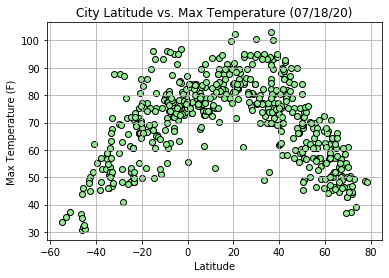

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### The weather becomes warmer the closer you get to the equator (0 degrees latitude). There are some spikes in temperature between 20 degrees and 40 degrees latitude.

## Latitude vs Humidity Plot

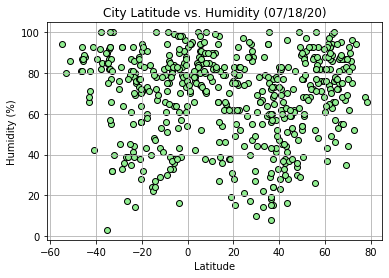

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude and humiditiy have no direct relationship.

## Latitude vs Cloudiness Plot

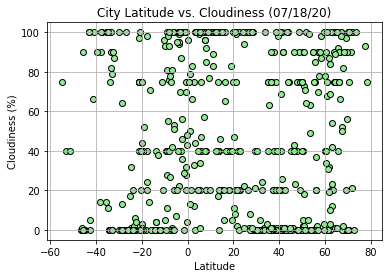

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude and cloudiness have no direct relationship.

## Latitude vs Wind Speed Plot

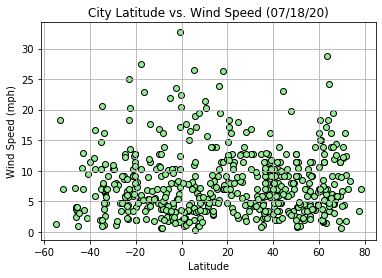

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Cities", color = "lightgreen")

# Incorporate the other graph properties, add today's date for reference
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

### Latitude and wind speed have no direct relationship.

## Linear Regression

In [14]:
# y = mx + b  (b = intercept, m = slope, x,y remain the same)
# r squared values range from 0 to 1 or 0% to 100%; the higher the r squared, the better the models fits the data

# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Max Temperature vs Latitude Linear Regression

The r-squared is: 0.4726494012226664


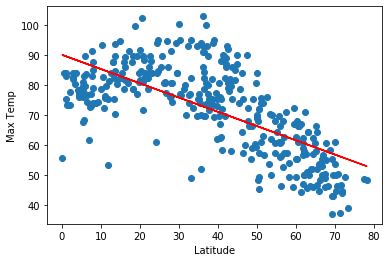

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

### In the Northern Hemisphere there is a negative correlation between temperature and latitude. The further away from the equator (0 degrees latitude), the lower the temperature.

The r-squared is: 0.5413008564909481


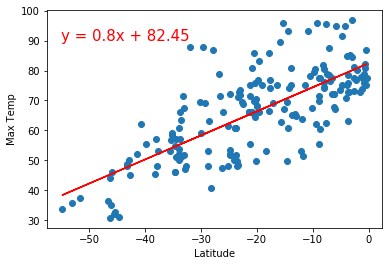

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

### In the Southern Hemisphere there is a positive correlation between latitude and max temperature. The closer you get to the equator (0 degrees latitude), the higher the temperature.

## Humidity vs Latitude Linear Regression

The r-squared is: 0.00042017814593273145


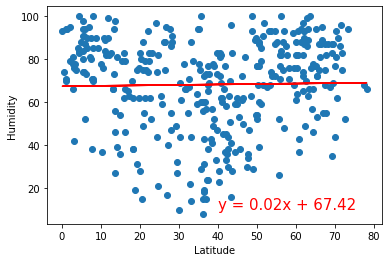

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

### In the Northern Hemisphere there is no correlation between humidity and latitude.

The r-squared is: 0.020029498172133262


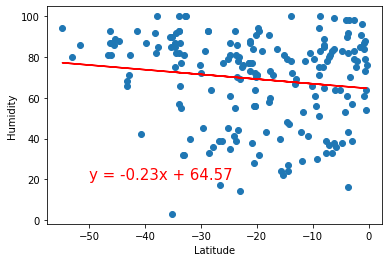

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

### In the Southern Hemisphere there is no correlation between humidity and latitude.

## Cloudiness (%) vs Latitude Linear Regression

The r-squared is: 0.0052404021098513


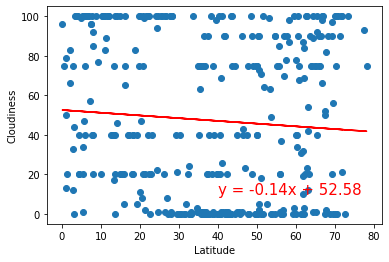

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

### In the Northern Hemisphere there is no correlation between cloudiness and latitude.

The r-squared is: 0.01324353205132219


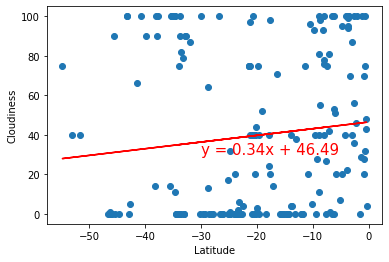

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

### In the Southern Hemisphere there is no correlation between cloudiness and latitude.

## Wind Speed (mph) vs Latitude Linear Regression

The r-squared is: 8.465531493853497e-07


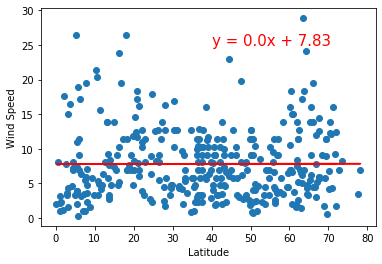

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

### In the Northern Hemisphere there is no correlation between windspeed and latitude.

The r-squared is: 0.003569918545661749


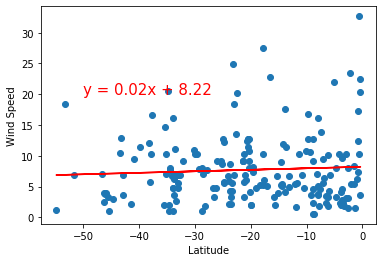

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

### In the Souththern Hemisphere there is no correlation between wind speed and latitude.